[View in Colaboratory](https://colab.research.google.com/github/rajagopalmotivate/FullyConvNetwork/blob/master/ConvertFCtoCNNver1.ipynb)

In [1]:
from keras import  layers
from keras import models
from keras.datasets import mnist
from keras import  utils
import matplotlib.pyplot as plt

model = models.Sequential()
layer1c = layers.Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1) )
layer1m = layers.MaxPooling2D(pool_size=(2,2), strides=2)
#layer2c = layers.Conv2D(64, (3,3), activation='relu')
#layer2m = layers.MaxPooling2D(2,2)

model.add(layer1c)
model.add(layer1m)
#model.add(layer2c)
#model.add(layer2m)

layerFlatten = layers.Flatten()
layerd1 = layers.Dense(64, activation='relu')
layerd2 = layers.Dense(10, activation='softmax' )

layerd1FULLYCON =  layers.Conv2D(64, (12,12), activation='relu' )
layerd2FULLYCON =  layers.Conv2D(10, (1,1), activation='softmax' )


#layerd1 = layers.Conv2D(64, (3,3), activation='relu')
#layerd2 = layers.Dense(10, activation='softmax' )

Archi='FULLYCONNECTED'

if(Archi=='FULLYCONNECTED'):
    model.add( layerd1FULLYCON )
    model.add( layerd2FULLYCON )
else:
    model.add( layerFlatten )
    model.add( layerd1 )
    model.add( layerd2 )

print(model.summary())

(trainX, trainY), (testX, testY) = mnist.load_data()

print("No of Training samples = " + str(len(trainX)) )
print("No of Test samples = " + str(len(testX)) )

trainSetSize = len(trainX)
testSetSize = len(testX)

trainX = trainX[0:trainSetSize]
trainY = trainY[0:trainSetSize]

testX = testX[0:testSetSize]
testY = testY[0:testSetSize]


trainX = trainX.astype('float') * 1 /255
testX = testX.astype('float') * 1 /255

print( "Shape of trainX = " + str(trainX.shape) )


trainXready = trainX.reshape((trainSetSize, 28, 28, 1))
testXready = testX.reshape((testSetSize, 28, 28, 1))

print( "Shape of trainXready = " + str(trainXready.shape) )


trainYready = utils.to_categorical(trainY)
testYready = utils.to_categorical(testY)

trainYreadyTENSOR = trainYready.reshape(60000, 1, 1, 10)
testYreadyTENSOR = testYready.reshape(10000, 1, 1, 10)


print(' a sample from trainY:' + str(trainY[0]))
print(' a sample from trainYready:' + str(trainYready[0]))
print(' shape of  trainX[o]:' + str((trainX[0]).shape))
print(' shape of  trainYreadyTENSOR[o]:' + str((trainYreadyTENSOR[0]).shape))

print(' a sample from trainYreadyTENSOR:' + str(trainYreadyTENSOR[0]))

print(' a sample from trainX:' + str(trainX[0]))



print( "Shape of trainY = " + str(trainY.shape) )

print( "Shape of trainYready = " + str(trainYready.shape) )
print( "Shape of trainYreadyTENSOR = " + str(trainYreadyTENSOR.shape) )


model.compile( optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'] )

# batchsize 32, epoch 20, Test Accracy 
# batchsize 64, epoch 5 , Test Accuracy 99.16%

model.fit(trainXready, trainYreadyTENSOR, batch_size=32, epochs=2)

testLoss, testAccuracy = model.evaluate(testXready, testYreadyTENSOR)

print("Test Accuracy : " + str(testAccuracy) )




Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 64)          294976    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          650       
Total params: 296,458
Trainable params: 296,458
Non-trainable params: 0
_________________________________________________________________
None
11493376/11490434 [==============================] - 2s 0us/step
No of Training samples = 60000
No of Test samples = 10000
Shape of trainX = (60000, 28, 28)
Shape of trainXready = (60000, 28, 28, 1)
 a sample from trainY:5
 a sample from trainYready:[0. 0. 0. 0. 

TypeError: ignored

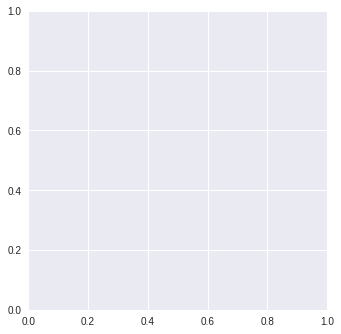

In [2]:
randomimage = 20

sampleimage = testXready[20]

plt.imshow(sampleimage)
plt.show()

